# Ai Project Phase-3

In this phase, we've applied an unsupervised learning algorithm (K-means clustering) to our
dataset using at least three different sizes of K. We justified our choice for the sizes of K, then we compared and discussed the results on our dataset using different evaluation methods and metrics (Silhouette coefficient, total within-cluster sum of square, BCubed precision and recall).

This Jupiter notebook include the following:

o Our code with suitable comments.
o The results of applying different sizes of K with interpreting our results.

# Unsupervised Learning: (Clustering)

Clustering is the process of grouping similar data points together. First, we prepared the data for clustering. After that, we used the k-mean approach which further selects k ojects at random and sets them as cluster centers and allocates the objects to the closest cluster center.To improve the cluster we iteratively updated the cluster center and reassigned the items to the new center. We have used the k-means() to divide our dataset to groups.


In [86]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from plotnine import *
from sklearn.decomposition import PCA


# Load the dataset
path = "/Users/njodalghonaim/Desktop/Data/dataset.csv"
df = pd.read_csv(path)

# delete the outcome variable
X=df.drop('price_range', axis=1)
y=df['price_range']
X.shape


(2000, 20)

In [105]:
# data preprossing
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
# fit the dataset
mdata_scaled = scaler.fit_transform(X)
# display the shape of the data
mdata_scaled.shape


(2000, 20)

# Building and training the clustering model.

To start of our clustering model we will be setting the number of clusters as 5 as a trial and after that we will be doing measurment to decide on the number of k we should use and perform the k-means clustering model on 3 different sizes of k based on the results of this k-mean model size. 

In [106]:
# building the model with k = 5
kmeans=KMeans(n_clusters=5, max_iter=300)
kmeans.fit(mdata_scaled)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


KMeans(n_clusters=5)

After that we will be checking the SSE (Sum of Squared Errors), which is a measure of the within-cluster sum of squared distances between each data point and the centroid of its cluster. The lower the SSE value, the better the clustering. SSE can be used to evaluate the quality of a K-means clustering solution. A low SSE value indicates that the data points are well-clustered and that the centroids are representative of the data points in their respective clusters.



In [107]:
# measuring the SSE
kmeans.inertia_

33323.88231323927

We will then be checking the Coordinates of cluster centers.

In [108]:
# cluster values
kmeans.cluster_centers_

array([[ 8.54490499e-02, -4.24522651e-03,  2.54595960e-02,
        -4.46490855e-02,  1.54408821e+00,  1.99349626e-01,
        -1.64791942e-01, -5.84362706e-02,  1.02284929e-01,
        -5.84868597e-03,  1.11337470e+00, -1.22130032e-02,
        -4.37607949e-02,  1.51535219e-01, -1.53253082e-01,
        -2.34979976e-01,  4.80549190e-02,  4.52677595e-01,
         7.09243536e-02,  6.29292443e-02],
       [-9.08447915e-02,  4.20876659e-02, -3.67573233e-03,
        -8.30631226e-03, -2.98007018e-01,  3.74458647e-01,
         4.65170637e-02, -9.87987389e-02, -1.99689779e-01,
         4.71490014e-02, -1.88213232e-01, -5.55927129e-01,
        -5.69743542e-01, -1.04804939e-01,  8.52737980e-01,
         9.02544809e-01, -1.64519155e-01,  5.53366563e-01,
        -1.02258525e-01, -4.07419608e-02],
       [-2.70569447e-02,  7.16775928e-02,  6.31754532e-02,
         2.94634684e-02, -8.65318652e-02, -1.04396559e+00,
         2.01417060e-02,  2.83061559e-02, -3.11474926e-03,
         2.47424408e-02, -3.5

We will also check the number of iterations that has been run.

In [109]:
#Showing number of runs
kmeans.n_iter_

59

To make sure that all features has been seen during the fit, we will be using the below code.

In [110]:
# Checking number of features
kmeans.n_features_in_

20

Labels of each point.

In [127]:
# Checking number of labels
cluster_labels=kmeans.labels_
cluster_labels

array([2, 4, 4, ..., 3, 1, 1], dtype=int32)

We will then be measuring the Silhouette score which is a measure of how well each data point is clustered. It is calculated as the ratio between the average intra-cluster distance and the average nearest-cluster distance for each data point. The higher the silhouette score, the better the clustering. Additionally, Silhouette score can be used to evaluate the quality of a clustering solution. A high silhouette score indicates that the data points are well-clustered and that the clusters are well-separated.


In [113]:
# Checking silhouette score
silhoutte_avg=silhouette_score(mdata_scaled,cluster_labels )
print("The silhouette score is: {0}".format(silhoutte_avg))

The silhouette score is: 0.05389700020775871


We will then be finding the Optimal Silhouette score and SSE.

In [114]:
# optimizing the clusters 
sse=[]
s_score=[]
max_k=5
for num_custer in range(2,max_k):
  model=KMeans(n_clusters=num_custer, max_iter=60)
  model.fit(mdata_scaled)
  # SSE:Store inertia value
  sse.append(model.inertia_)
  #silhouette_score
  sc=silhouette_score(mdata_scaled, model.labels_, sample_size=1000)
  s_score.append(sc)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


We will then be visualizing the SSE based on the number of clusters and find the optimal solution.

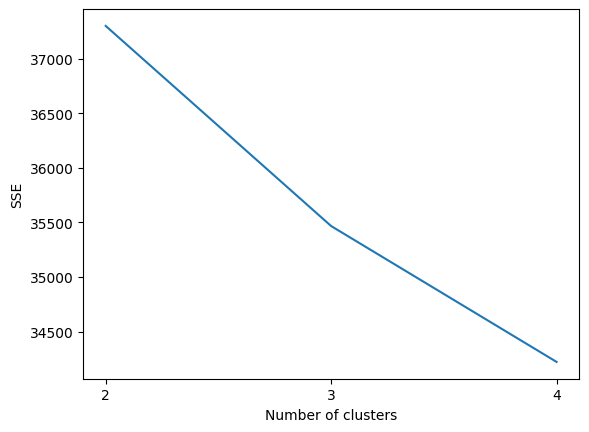

In [115]:
# plotting of silhouette score
plt.plot(range(2,max_k), sse )
plt.xticks(range(2,max_k))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

The output of this above code demonstrates the optimal number of clusters is likely to be k=2 and will be confirmed after applying the model.

In [116]:
# Displaying the silhouette scores for each cluster
s_score

[0.0661676622216104, 0.06486196912102209, 0.05674427857187758]

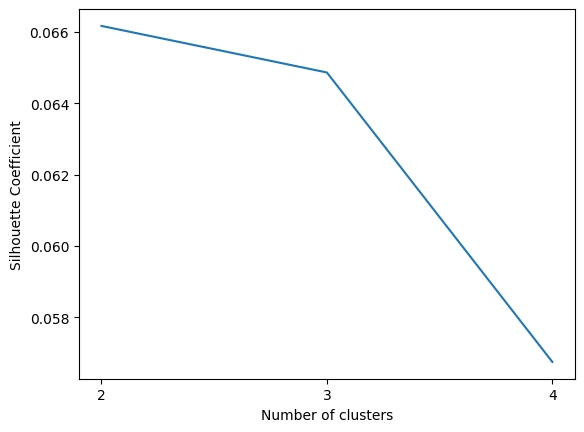

In [117]:
#Silhouette Coefficient plot:
#Analysing silhouette score on plot
plt.plot(range(2,max_k), s_score )
plt.xticks(range(2,max_k))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

After performing the above calculation we will be using it's results to choose the sizes of k, We can see that a higher Solihouette score and SSE value are found in the 2,3,4 k-means cluster sizes. based on this observation, we will be choosing them as our clustering k-means sizes.

In [118]:
# building the model with k = 2
kmeans1=KMeans(n_clusters=2, max_iter=300)
kmeans1.fit(mdata_scaled)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


KMeans(n_clusters=2)

In [119]:
# measuring the SSE for k=2
kmeans1.inertia_

37298.94700775185

In [121]:
# measuring the cluster centers values for k =2
kmeans1.cluster_centers_

array([[-0.01635326, -0.01403414,  0.0449671 , -0.00332662,  0.01728774,
        -1.04396559, -0.00907203,  0.00190346,  0.01726378,  0.03101152,
         0.00584435,  0.02008197, -0.00777568, -0.00763502, -0.02835986,
        -0.03863192,  0.04867783, -0.60993227, -0.01749457,  0.0183947 ],
       [ 0.01500486,  0.01287696, -0.04125936,  0.00305232, -0.01586229,
         0.95788598,  0.008324  , -0.00174651, -0.01584031, -0.02845448,
        -0.00536246, -0.01842612,  0.00713454,  0.00700547,  0.02602146,
         0.03544654, -0.04466413,  0.55964063,  0.01605206, -0.01687797]])

In [122]:
# measuring the number of iteration thay has been run for k = 2
kmeans1.n_iter_


12

In [123]:
# measuring the number of features used for k = 2
kmeans1.n_features_in_

20

In [128]:
# Checking number of labels
cluster_labels1=kmeans1.labels_
cluster_labels1

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [129]:
# Checking silhouette score
silhoutte_avg=silhouette_score(mdata_scaled,cluster_labels1 )
print("The silhouette score is for k =2 : {0}".format(silhoutte_avg))

The silhouette score is for k =2 : 0.06771623890102013


In [130]:
# building the model with k = 3
kmeans2=KMeans(n_clusters=3, max_iter=300)
kmeans2.fit(mdata_scaled)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


KMeans(n_clusters=3)

In [131]:
# measuring the SSE for k=3
kmeans2.inertia_

35466.38663173656

In [132]:
# measuring the cluster centers values for k = 3
kmeans2.cluster_centers_

array([[-2.05885131e-02,  5.40278587e-02,  8.29702032e-02,
         2.50296755e-02, -3.20308023e-03, -1.04396559e+00,
         1.67356730e-02,  2.15592111e-02, -2.77068032e-03,
         2.63252384e-02,  2.36155130e-03,  5.57031379e-02,
        -6.25369983e-04, -2.82233615e-02, -2.15011793e-02,
        -5.52876005e-02,  7.62775587e-02, -1.78686097e+00,
        -2.48683722e-02, -7.71144758e-03],
       [ 8.38549709e-02, -3.77725893e-02,  4.54206078e-03,
        -1.14562082e-01,  8.80725826e-01,  2.98039997e-01,
        -1.45813360e-01, -2.09797148e-02,  4.88912139e-02,
        -4.86451489e-02,  9.34339155e-01, -6.98316636e-02,
        -8.06503066e-02,  7.99719901e-02, -3.38273459e-02,
        -1.99902480e-02,  2.74280244e-02,  5.59640631e-01,
         7.68039303e-02, -7.63132115e-03],
       [-4.78661464e-02, -2.29061733e-03, -4.74069286e-02,
         6.70456224e-02, -6.16277038e-01,  3.47265329e-01,
         9.33942728e-02,  3.23074545e-03, -3.28291261e-02,
         2.01028098e-02, -6.5

In [133]:
# measuring the number of iteration thay has been run for k = 3
kmeans2.n_iter_

24

In [134]:
# measuring the number of features used for k = 3
kmeans2.n_features_in_

20

In [135]:
# Checking number of labels
cluster_labels2=kmeans2.labels_
cluster_labels2

array([0, 2, 2, ..., 2, 2, 1], dtype=int32)

In [136]:
# Checking silhouette score for k = 3
silhoutte_avg=silhouette_score(mdata_scaled,cluster_labels2 )
print("The silhouette score is for k = 3 : {0}".format(silhoutte_avg))

The silhouette score is for k = 3 : 0.06559691756605338


In [137]:
# building the model with k = 4
kmeans3=KMeans(n_clusters=4, max_iter=300)
kmeans3.fit(mdata_scaled)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


KMeans(n_clusters=4)

In [138]:
# measuring the SSE for k=4
kmeans3.inertia_

34223.332604348834

In [139]:
# measuring the cluster centers values for k = 4
kmeans3.cluster_centers_

array([[-0.11773944, -0.05095063, -0.16119766, -0.07093154, -0.46448845,
         0.39754829,  0.07707301,  0.03698836,  0.00635873,  0.12969892,
        -0.3589256 ,  0.81327712,  0.79793355,  0.02779599,  0.55317257,
         0.57179335, -0.11606673,  0.55434379,  0.05946382,  0.20498171],
       [ 0.04858851,  0.00553599,  0.0638396 , -0.06811944,  1.25809644,
         0.28762317, -0.19057276,  0.01173576,  0.07779513, -0.04604689,
         1.03618165, -0.12234797, -0.11005414,  0.08345074, -0.00228503,
        -0.02235367,  0.03844004,  0.533452  ,  0.02971482,  0.01725169],
       [ 0.06672714, -0.01194417,  0.01537906,  0.08132816, -0.53751576,
         0.29269392,  0.06059518, -0.05444842, -0.05305126, -0.07817513,
        -0.46812211, -0.51393416, -0.47169391, -0.05538614, -0.36152224,
        -0.33445512, -0.00230063,  0.55964063, -0.04048349, -0.14567572],
       [-0.02586199,  0.05883521,  0.07006069,  0.02134356, -0.03168528,
        -1.04396559,  0.02669538,  0.02780176, -

In [140]:
# measuring the number of iteration thay has been run for k = 4
kmeans3.n_iter_

29

In [141]:
# measuring the number of features used for k = 4
kmeans3.n_features_in_

20

In [142]:
# Checking number of labels
cluster_labels3=kmeans3.labels_
cluster_labels3

array([3, 0, 0, ..., 2, 2, 1], dtype=int32)

In [143]:
# Checking silhouette score for k = 4
silhoutte_avg=silhouette_score(mdata_scaled,cluster_labels3 )
print("The silhouette score is for k = 4 : {0}".format(silhoutte_avg))

The silhouette score is for k = 3 : 0.05829729511603017
